In [5]:
polygon_pts = [
     {
            "x": 165.61456298828125,
            "y": 212
        },
     {
            "x": 217.61456298828125,
            "y": 333
        },
    {
            "x": 337.61456298828125,
            "y": 256
        },
     {
            "x": 276.61456298828125,
            "y": 165
        }
    
]

poly_points = pts = [ [p['x'], p['y']] for p in polygon_pts]

print(poly_points)
from shapely import Polygon
poly = Polygon(poly_points)

poly.area

[[165.61456298828125, 212], [217.61456298828125, 333], [337.61456298828125, 256], [276.61456298828125, 165]]


15746.0

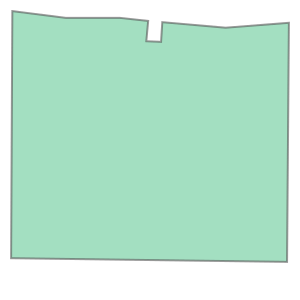

In [15]:
from shapely import Polygon

# Your points in pixels
points = [
    [
        398.27809917355376,
        463.2761310452418
    ],
    [
        400.27479338842977,
        864.6489859594384
    ],
    [
        487.13099173553724,
        853.6661466458659
    ],
    [
        574.9855371900827,
        853.6661466458659
    ],
    [
        620.9095041322314,
        848.6739469578783
    ],
    [
        617.9144628099174,
        815.7254290171608
    ],
    [
        641.8747933884298,
        814.7269890795632
    ],
    [
        643.8714876033058,
        846.6770670826834
    ],
    [
        746.7012396694215,
        837.6911076443058
    ],
    [
        849.5309917355372,
        845.6786271450858
    ],
    [
        846.5359504132232,
        457.2854914196568
    ]
]

# Create a Polygon object
poly = Polygon(points)


# points_to_buffer = [
#         746.7012396694215,
#         837.6911076443058
#     ]

poly
# # Calculate the area in square pixels
# area_in_pixels = poly.area

# # Conversion factor: x pixels per foot
# # Example: if 100 pixels = 1 foot, then conversion_factor = 100
# conversion_factor = 10  # Replace with your actual conversion factor

# # Calculate the area in square feet
# area_in_sqft = (area_in_pixels / (conversion_factor ** 2))

# print(f"Area in square feet: {area_in_sqft}")


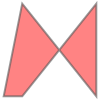

In [9]:
from shapely.geometry import Polygon, Point

# Define your polygon
original_polygon = Polygon([(0, 0), (1, 1), (1, 0), (0, 1)])


# Define the buffer distance for specific points
buffer_distance = 0.2

# Specify which points to buffer (e.g., buffer only the first and last points)
points_to_buffer = [0, 3]  # Indices of points to buffer

# # Create a list to hold the buffered points
buffered_points = []

# Iterate through the polygon's exterior coordinates
for i, (x, y) in enumerate(original_polygon.exterior.coords):
    if i in points_to_buffer:
        # Buffer the specified points
        buffered_points.append(Point(x, y).buffer(buffer_distance))
    else:
        # Keep the original point if not buffering
        buffered_points.append(Point(x, y))

# Create a new polygon from the buffered points
# Note: This will create a MultiPolygon if the buffers overlap
buffered_polygon = Polygon([p.exterior.coords[0] if isinstance(p, Polygon) else (p.x, p.y) for p in buffered_points if p.is_valid])

original_polygon
buffered_polygon

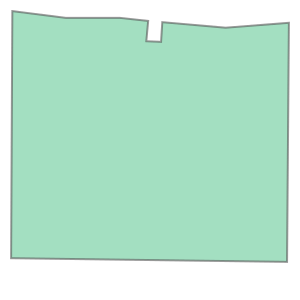

In [22]:
from shapely.geometry import Polygon, Point
import matplotlib.pyplot as plt

# Your points
points = [
    [398.27809917355376, 463.2761310452418],
    [400.27479338842977, 864.6489859594384],
    [487.13099173553724, 853.6661466458659],
    [574.9855371900827, 853.6661466458659],  # 4th point (where we'll add buffer)
    [620.9095041322314, 848.6739469578783],
    [617.9144628099174, 815.7254290171608],
    [641.8747933884298, 814.7269890795632],
    [643.8714876033058, 846.6770670826834],
    [746.7012396694215, 837.6911076443058],
    [849.5309917355372, 845.6786271450858],
    [846.5359504132232, 457.2854914196568]
]

# Create the original polygon (closing it by adding first point at end)
points_closed = points + [points[0]]
original_polygon = Polygon(points_closed)

# Define buffer distance for the 4th point
buffer_distance = -30  # Adjust this value as needed

# Create buffer around the 4th point (index 3 since we start at 0)
fourth_point = Point(points[3])  # 4th point
buffered_area = fourth_point.buffer(buffer_distance)

# Combine the original polygon with the buffer
result = original_polygon.union(buffered_area)


result
# # Visualization function
# def plot_polygons(original, buffered, buffer_point):
#     fig, ax = plt.subplots()
    
#     # Plot original polygon
#     x, y = original.exterior.xy
#     ax.plot(x, y, 'b-', label='Original Polygon')
    
#     # Plot buffered result
#     x, y = buffered.exterior.xy
#     ax.plot(x, y, 'r-', label='Buffered Result')
    
#     # Plot the buffered point location
#     ax.plot(buffer_point.x, buffer_point.y, 'go', label='4th Point')
    
#     ax.set_aspect('equal')
#     ax.legend()
#     plt.title('Polygon with Buffer on 4th Point')
#     plt.show()

# # Show the result
# plot_polygons(original_polygon, result, fourth_point)

# # Print information
# print(f"Original area: {original_polygon.area:.2f}")
# print(f"Buffered area: {result.area:.2f}")
# print("\nBuffered polygon coordinates:")
# for coord in result.exterior.coords:
#     print(f"({coord[0]:.2f}, {coord[1]:.2f})")